# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_selection import VarianceThreshold

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
url = 'https://raw.githubusercontent.com/fathiyyaa/Proyek-Machine-Learning/main/data/bank_transactions_data_2.csv'
df = pd.read_csv(url, sep=',')

print(df.head())  # Menampilkan lima baris pertama dari dataset

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Struktur Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

## Missing value

In [ ]:
df.isna().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


Tidak terdapat Missing value dalam data

## Analisis Distribusi dan Korelasi

In [ ]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


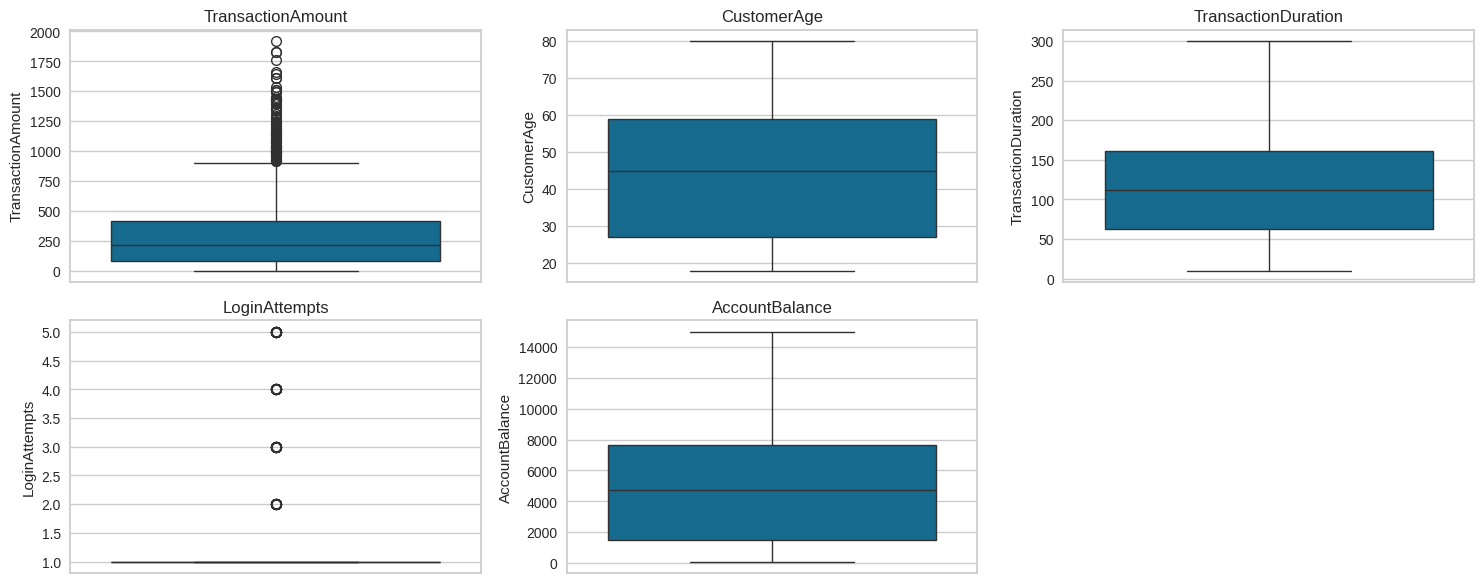

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns

# Buat subplot untuk setiap variabel numerik
plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, (len(numerical_columns) + 1) // 2, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

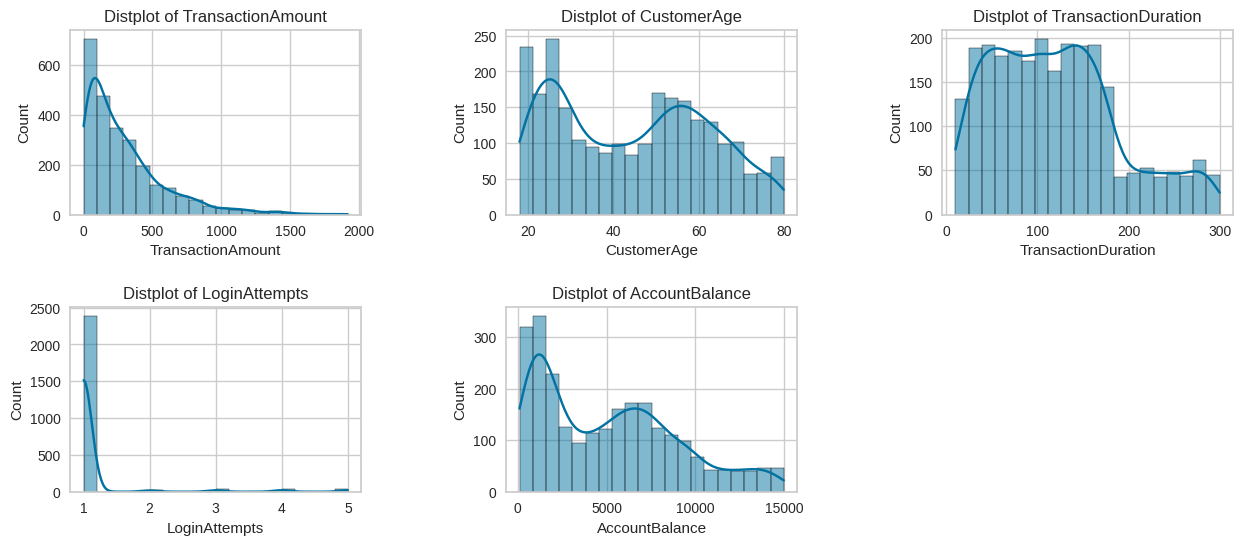

In [ ]:
plt.figure(1, figsize=(15, 6))
n = 0
for x in ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']:
    n += 1
    plt.subplot(2, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(df[x], bins=20, kde=True)  # ✅ Fix pakai histplot
    plt.title('Distplot of {}'.format(x))
plt.show()

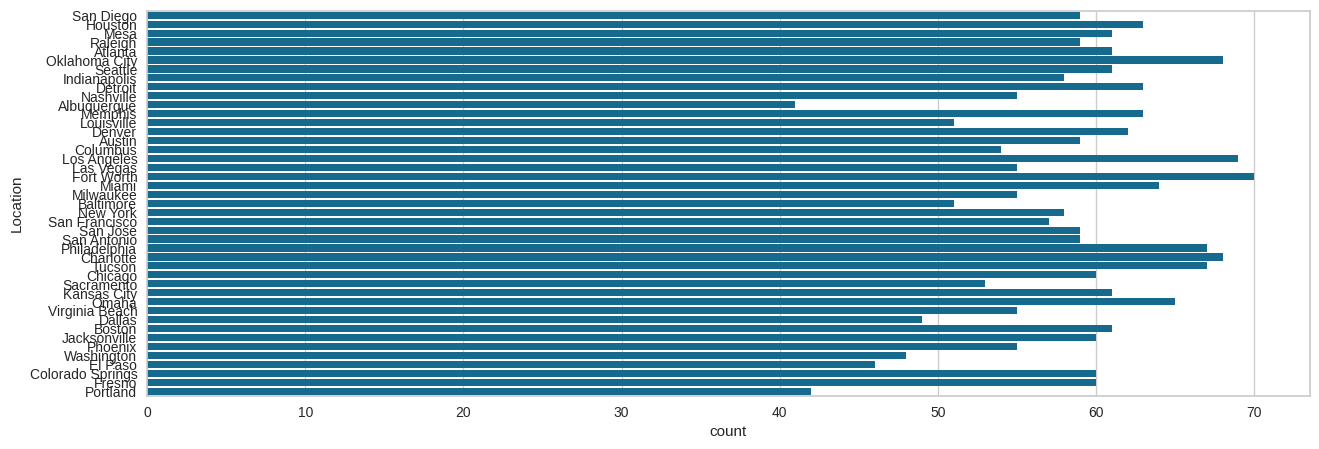

In [ ]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Location' , data = df)
plt.show()

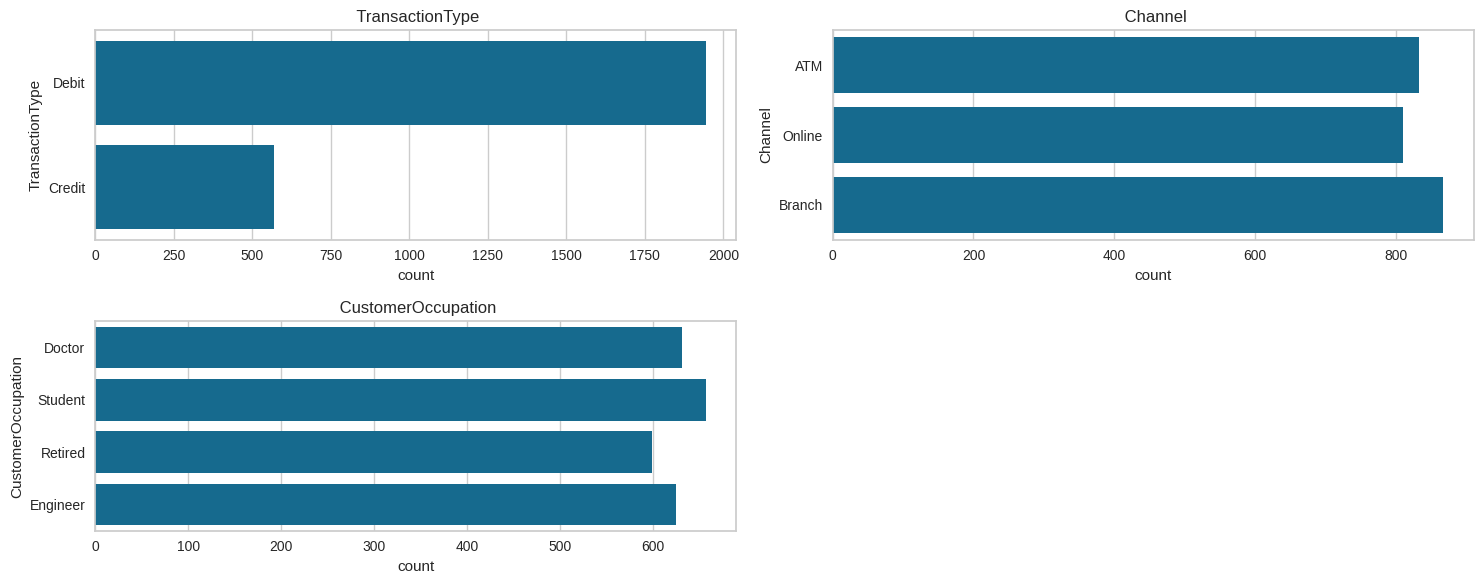

In [ ]:
plt.figure(figsize=(15, 6))
n = 0
for x in ['TransactionType', 'Channel', 'CustomerOccupation', ]:  # Variabel kategori
    n += 1
    plt.subplot(2, 2, n)
    sns.countplot(y=x, data=df)  # ✅ Tanpa kutip di variabel x
    plt.title(f' {x}')
plt.tight_layout()
plt.show()

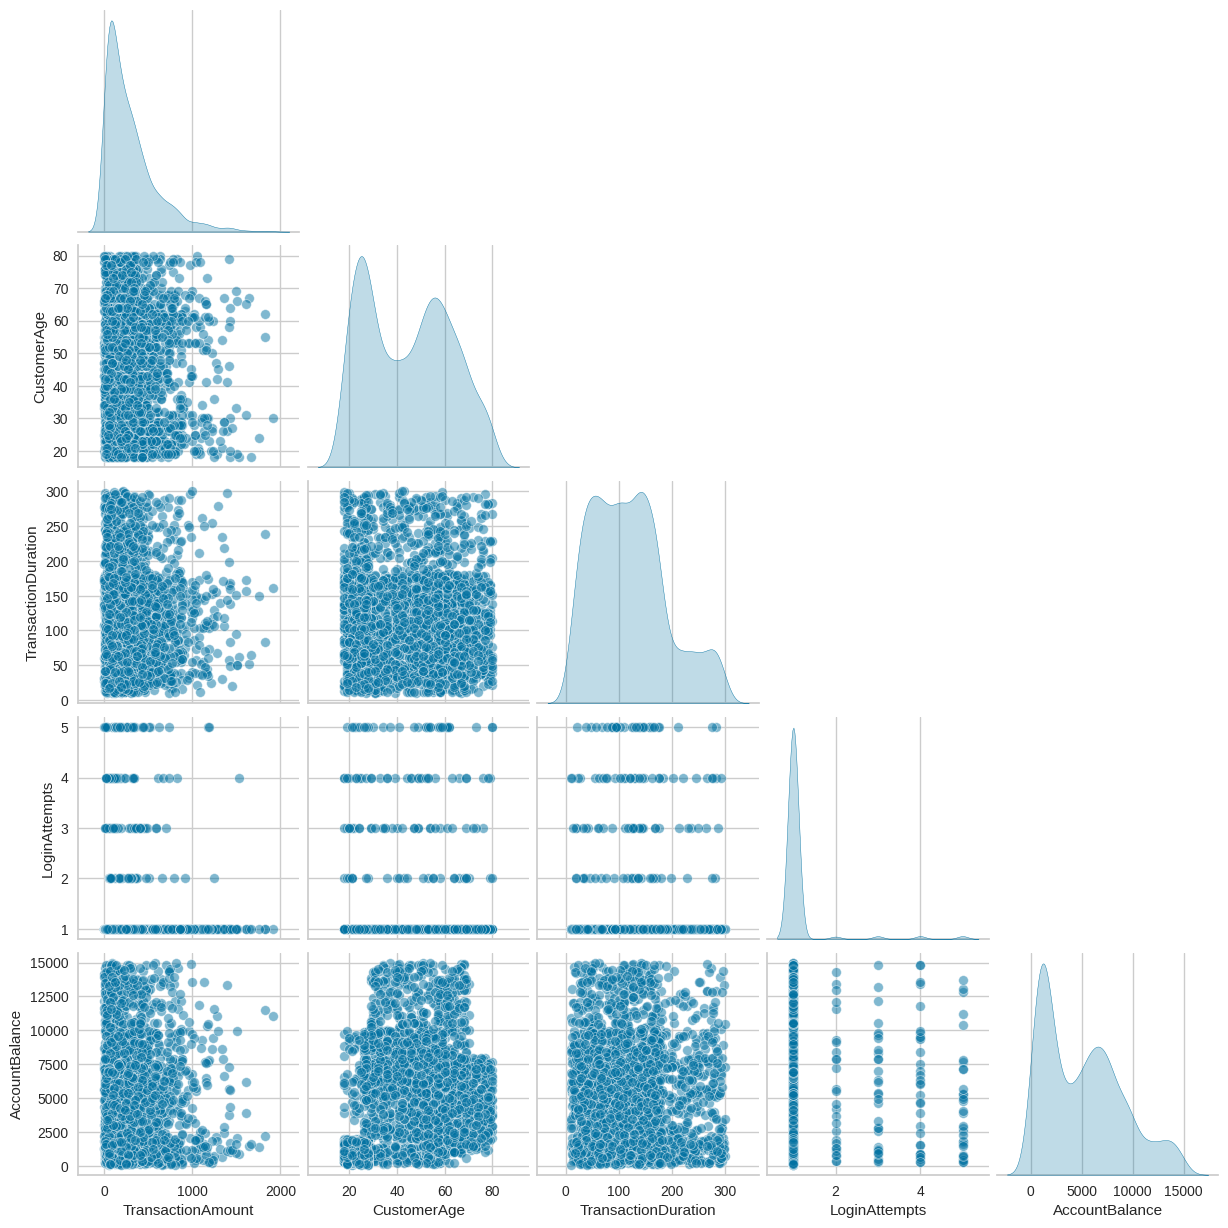

In [ ]:
def corrfunc(x, y, **kwargs):
    r = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.annotate(f"{r:.2f}", xy=(0.5, 0.5), xycoords=ax.transAxes,
                ha='center', va='center', fontsize=12, fontweight='bold')

# Buat Pairplot dengan Seaborn
g = sns.pairplot(df, diag_kind="kde", corner=True, plot_kws={'alpha': 0.5})  # alpha untuk transparansi

# Tambahkan label korelasi
g.map_upper(corrfunc)

plt.show()

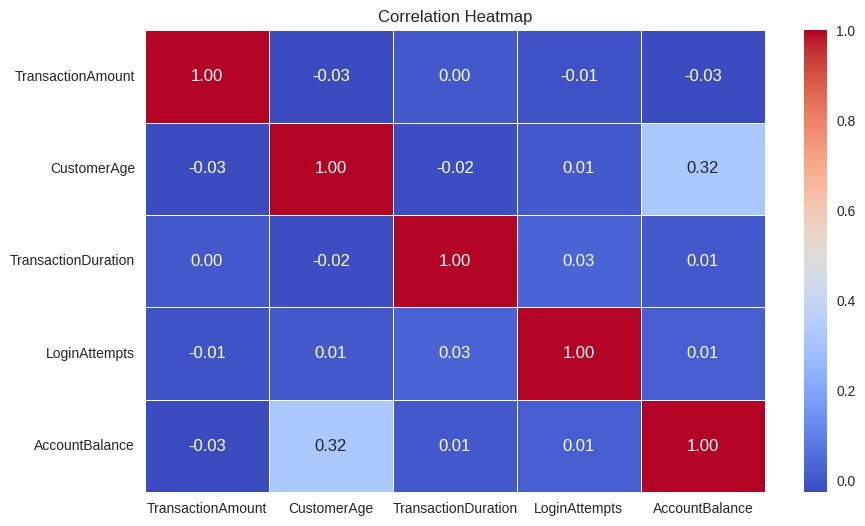

In [ ]:
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## Mengeluarkan variabel tidak terpakai

In [ ]:
# keluarkan variabel tidak dipakai
df.drop(['TransactionID', 'TransactionDate','IP Address','MerchantID', 'PreviousTransactionDate','DeviceID','AccountID'], axis=1, inplace=True)

## Missing value

In [ ]:
df.isna().sum()

,0
TransactionAmount,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [ ]:
## Outlier

In [ ]:
# Find outliers using IQR method for numerical features
numerical_cols = df.select_dtypes(include=['number']).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}:\n{outliers}")


Outliers in TransactionAmount:
      TransactionAmount TransactionType          Location Channel  \
74              1212.51           Debit      Indianapolis  Branch   
82               922.55           Debit           Detroit     ATM   
85              1340.19          Credit            Austin  Online   
110             1045.22           Debit          Columbus     ATM   
129             1036.66           Debit       San Antonio  Branch   
...                 ...             ...               ...     ...   
2401             953.17           Debit           Raleigh  Online   
2403            1493.00           Debit  Colorado Springs     ATM   
2414            1664.33           Debit       San Antonio  Branch   
2428             981.90          Credit         Baltimore  Online   
2436             942.70           Debit            Boston  Online   

      CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
74             20            Student                   24       

In [ ]:
# Ganti outlier ke batas bawah / atas
df['TransactionAmount'] = np.where(df['TransactionAmount'] < lower_bound, lower_bound, df['TransactionAmount'])
df['TransactionAmount'] = np.where(df['TransactionAmount'] > upper_bound, upper_bound, df['TransactionAmount'])

## Encode Peubah kategorik

In [ ]:
encoders = {}

for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le

for col, le in encoders.items():
    print(f"{col}: {list(le.classes_)}")

TransactionType: ['Credit', 'Debit']
Location: ['Albuquerque', 'Atlanta', 'Austin', 'Baltimore', 'Boston', 'Charlotte', 'Chicago', 'Colorado Springs', 'Columbus', 'Dallas', 'Denver', 'Detroit', 'El Paso', 'Fort Worth', 'Fresno', 'Houston', 'Indianapolis', 'Jacksonville', 'Kansas City', 'Las Vegas', 'Los Angeles', 'Louisville', 'Memphis', 'Mesa', 'Miami', 'Milwaukee', 'Nashville', 'New York', 'Oklahoma City', 'Omaha', 'Philadelphia', 'Phoenix', 'Portland', 'Raleigh', 'Sacramento', 'San Antonio', 'San Diego', 'San Francisco', 'San Jose', 'Seattle', 'Tucson', 'Virginia Beach', 'Washington']
Channel: ['ATM', 'Branch', 'Online']
CustomerOccupation: ['Doctor', 'Engineer', 'Retired', 'Student']


## Normalisasi

In [ ]:
df_scaled = df.copy()

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Pilih kolom numerik yang ingin dinormalisasi
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# Normalisasi data numerik
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

# Tampilkan data setelah normalisasi
print(df_scaled.head())


   TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0           0.007207                1        36        0     0.838710   
1           0.195940                1        15        0     0.806452   
2           0.065680                1        23        2     0.016129   
3           0.096016                1        33        2     0.129032   
4           0.006874                0         1        2     0.129032   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  
0                   0             0.244828            0.0        0.336832  
1                   0             0.451724            0.0        0.918055  
2                   3             0.158621            0.0        0.068637  
3                   3             0.051724            0.0        0.569198  
4                   3             0.648276            0.0        0.492591  


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

### k-means

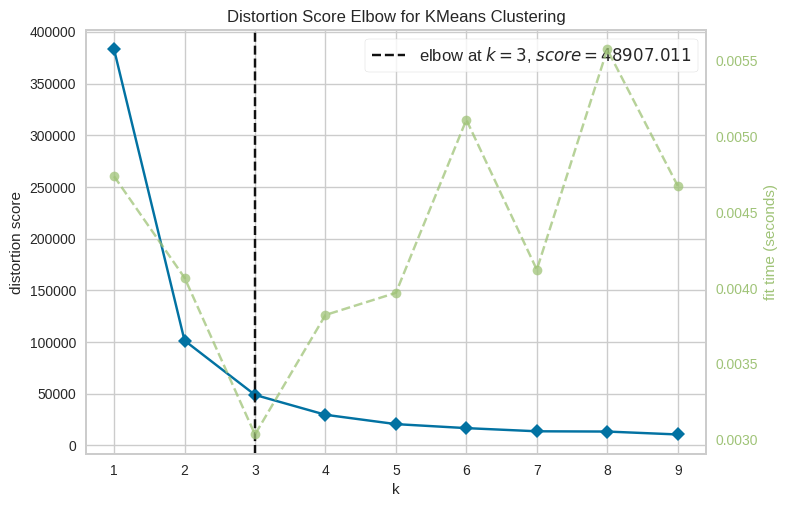

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans(init='k-means++', random_state=42)

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df_scaled)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [ ]:
# Melakukan clustering dengan K-Means
kmeans = KMeans(n_clusters=3,init='k-means++', random_state=10)
kmeans.fit(df_scaled)

# Mendapatkan label cluster
labels = kmeans.labels_

silhouette_avg = silhouette_score(df_scaled, labels)
print(f"The average silhouette score is : {silhouette_avg}")


The average silhouette score is : 0.5412493165842243


### dbscan

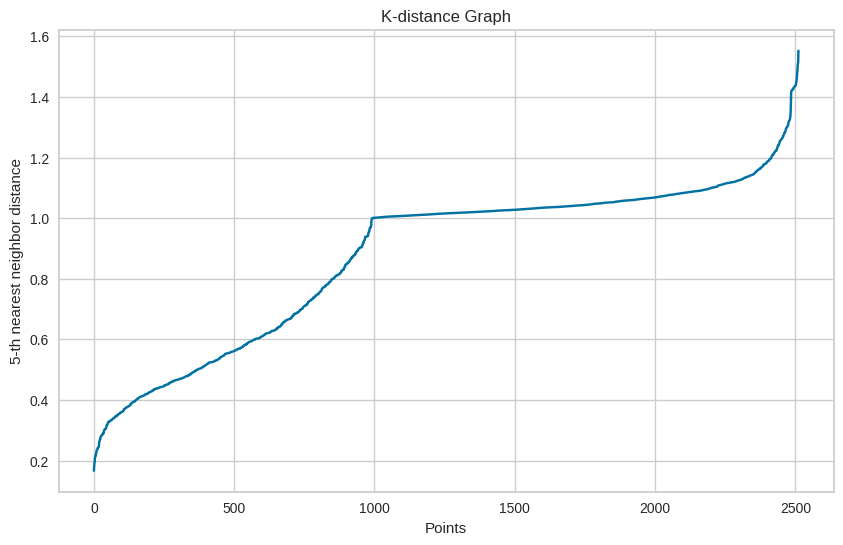

In [ ]:
# Function to plot k-distance graph
def plot_k_distance_graph(df_scaled, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(df_scaled)
    distances, _ = neigh.kneighbors(df_scaled)
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph')
    plt.show()
# Plot k-distance graph
plot_k_distance_graph(df_scaled, k=5)

In [ ]:
min_samples = df.shape[1] * 2  # 2 × jumlah fitur

In [ ]:

dbscan = DBSCAN(eps=1.5, min_samples=df.shape[1] * 2)
clusters = dbscan.fit_predict(df_scaled)

labels = dbscan.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

print(f"Jumlah cluster: {n_clusters}")
print(f"Jumlah noise: {n_noise}")

# Pastikan ada lebih dari 1 cluster sebelum menghitung silhouette score
unique_labels = set(labels) - {-1}  # Hilangkan noise (-1)
if len(unique_labels) > 1:
    silhouette_avg = silhouette_score(df_scaled[labels != -1], labels[labels != -1])
    print(f"Silhouette Score: {silhouette_avg:.4f}")
else:
    print("Tidak bisa menghitung Silhouette Score karena hanya ada satu cluster atau semuanya noise.")


Jumlah cluster: 1
Jumlah noise: 1
Tidak bisa menghitung Silhouette Score karena hanya ada satu cluster atau semuanya noise.


In [ ]:
for eps in np.arange(0.3, 2.1, 0.1):
    dbscan = DBSCAN(eps=eps, min_samples=10)
    labels = dbscan.fit_predict(df_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"eps={eps} → Clusters: {n_clusters}")


eps=0.3 → Clusters: 0
eps=0.4 → Clusters: 0
eps=0.5 → Clusters: 0
eps=0.6000000000000001 → Clusters: 2
eps=0.7000000000000002 → Clusters: 2
eps=0.8000000000000003 → Clusters: 2
eps=0.9000000000000001 → Clusters: 2
eps=1.0000000000000002 → Clusters: 2
eps=1.1000000000000003 → Clusters: 4
eps=1.2000000000000004 → Clusters: 1
eps=1.3000000000000005 → Clusters: 1
eps=1.4000000000000004 → Clusters: 1
eps=1.5000000000000004 → Clusters: 1
eps=1.6000000000000005 → Clusters: 1
eps=1.7000000000000004 → Clusters: 1
eps=1.8000000000000005 → Clusters: 1
eps=1.9000000000000006 → Clusters: 1
eps=2.0000000000000004 → Clusters: 1


In [ ]:
for min_samples in [5, 10, 15, 20, 25]:
    dbscan = DBSCAN(eps=0.5, min_samples=min_samples)
    labels = dbscan.fit_predict(df_scaled)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Menghitung jumlah cluster (tanpa noise)

    if n_clusters > 1:  # Silhouette Score hanya valid jika ada lebih dari 1 cluster
        sil_score = silhouette_score(df_scaled, labels)
        print(f"min_samples={min_samples} → Clusters: {n_clusters}, Silhouette Score: {sil_score:.4f}")
    else:
        print(f"min_samples={min_samples} → Clusters: {n_clusters}, Silhouette Score: Tidak valid (hanya 1 cluster)")


min_samples=5 → Clusters: 96, Silhouette Score: -0.5339
min_samples=10 → Clusters: 0, Silhouette Score: Tidak valid (hanya 1 cluster)
min_samples=15 → Clusters: 0, Silhouette Score: Tidak valid (hanya 1 cluster)
min_samples=20 → Clusters: 0, Silhouette Score: Tidak valid (hanya 1 cluster)
min_samples=25 → Clusters: 0, Silhouette Score: Tidak valid (hanya 1 cluster)


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

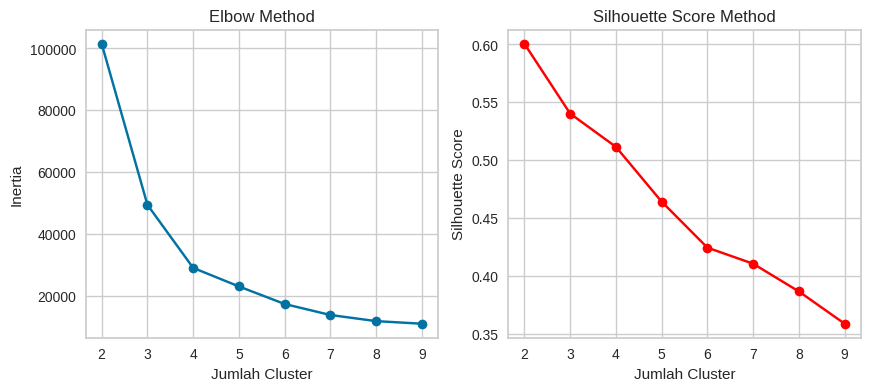

Jumlah cluster optimal berdasarkan Silhouette Score: 2
Silhouette Score untuk clustering dengan 2 cluster: 0.6008


In [ ]:
# Menentukan jumlah cluster optimal dengan Elbow Method
inertia = []
silhouette_scores = []
k_values = range(2, 10)  # Mencoba jumlah cluster dari 2 hingga 9

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=100)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df_scaled, labels))

# Plot Elbow Method
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='red')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')

plt.show()

# Menentukan jumlah cluster optimal berdasarkan hasil Elbow Method & Silhouette Score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f'Jumlah cluster optimal berdasarkan Silhouette Score: {optimal_k}')

# Melakukan clustering dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(df_scaled)
labels = kmeans.labels_

# Menghitung Silhouette Score untuk model final
final_silhouette = silhouette_score(df_scaled, labels)
print(f'Silhouette Score untuk clustering dengan {optimal_k} cluster: {final_silhouette:.4f}')

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

### Korelasi

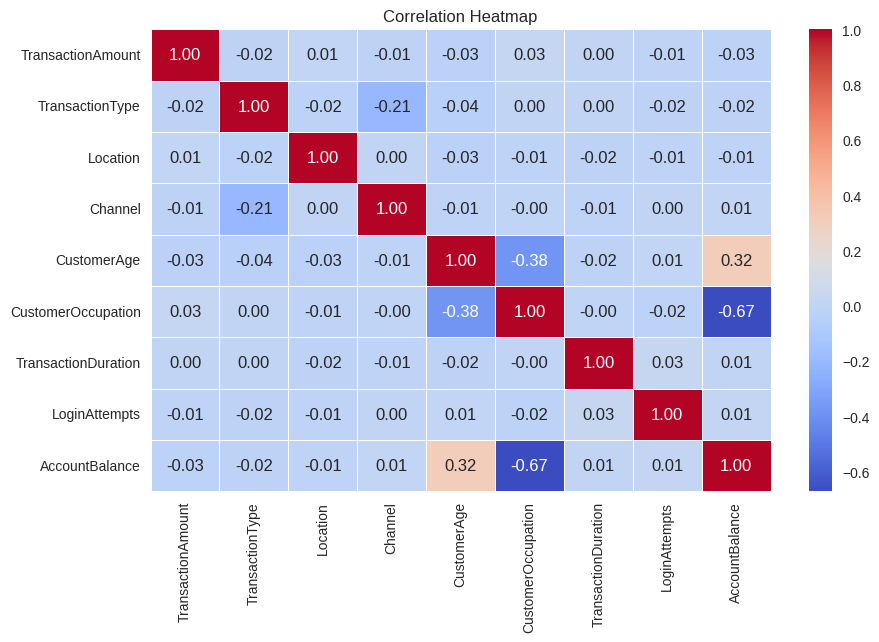

In [ ]:
corr = df_scaled.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

keluarkan peubah dengan korelasi > 0.6

In [ ]:
feature = df_scaled.drop(['CustomerOccupation'], axis=1)

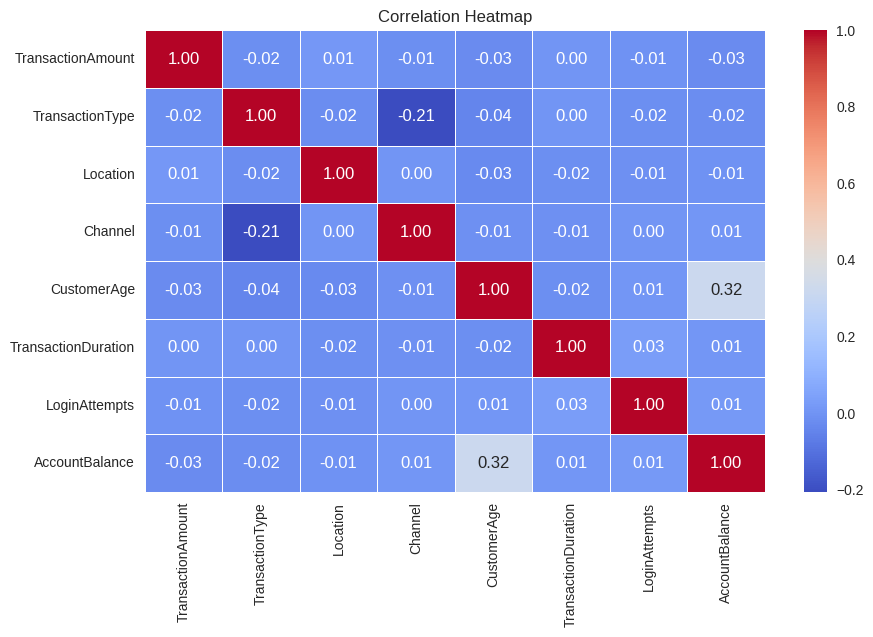

In [ ]:
corr = feature.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### VarianceThreshold

In [ ]:
# Simpan nama kolom sebelum transform
feature_names = feature.columns

# VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
X_selected = selector.fit_transform(feature)

# Ambil fitur yang lolos
selected_features = feature_names[selector.get_support()]

# Ambil 5 fitur pertama
X_selected = X_selected[:, :5]

print("5 Fitur yang dipilih:", selected_features[:5].tolist())


5 Fitur yang dipilih: ['TransactionAmount', 'TransactionType', 'Location', 'Channel', 'CustomerAge']


### PCA

In [ ]:
# Gunakan PCA sebelum clustering
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_selected)

# Clustering dengan K-Means
kmeans = KMeans(n_clusters=2, random_state=100)
labels = kmeans.fit_predict(X_pca)

explained_var = pca.explained_variance_ratio_

# Hitung variansi kumulatif
cumulative_var = explained_var.cumsum()

# Tampilkan
for i, cum_var in enumerate(cumulative_var):
    print(f"PC1 to PC{i+1}: {cum_var*100:.2f}%")

# Evaluasi dengan Silhouette Score
silhouette_avg = silhouette_score(X_pca, labels)
print(f"Silhouette Score setelah PCA: {silhouette_avg}")

PC1 to PC1: 99.38%
Silhouette Score setelah PCA: 0.6238603612122692


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

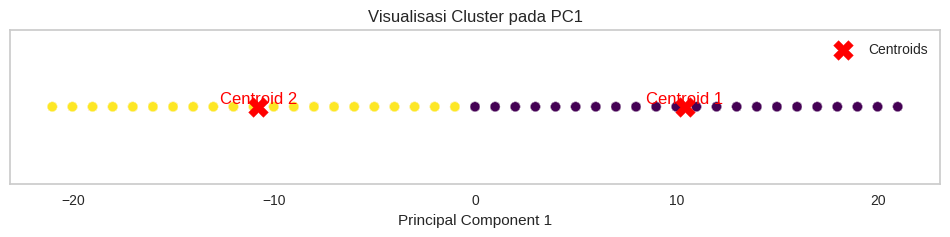

In [ ]:
centroids = kmeans.cluster_centers_  # Tambahkan ini untuk menghindari error
centroids_pc1 = centroids[:, 0]  # Ambil hanya PC1 dari centroid

# Ambil hanya PC1 untuk plotting
X_pc1 = X_pca[:, 0]

X_pc1 = X_pca[:, 0]

# Visualisasi cluster dalam 1D
plt.figure(figsize=(12, 2))

# Plot data hasil PCA (hanya PC1)
plt.scatter(X_pc1, [0]*len(X_pc1), c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids_pc1, [0]*len(centroids_pc1), c='red', s=200, marker='X', label='Centroids')

# Tambahkan label pada centroid
for i, centroid in enumerate(centroids_pc1):
    plt.text(centroid, 0, f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='bottom')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster pada PC1')
plt.xlabel('Principal Component 1')
plt.yticks([])  # Hilangkan sumbu y untuk tampilan 1D
plt.legend()
plt.grid(False)  # Menghilangkan grid agar lebih bersih

plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
df_scaled['TransactionType'] = encoders['TransactionType'].inverse_transform(df_scaled['TransactionType'])
df_scaled['Channel'] = encoders['Channel'].inverse_transform(df_scaled['Channel'])
df_scaled['Location'] = encoders['Location'].inverse_transform(df_scaled['Location'])

In [ ]:
# Balikkan normalisasi ke skala aslinya
df_scaled[numerical_cols] = scaler.inverse_transform(df_scaled[numerical_cols])

# Tampilkan data setelah inverse transform
print(df_scaled.head())

   TransactionAmount TransactionType   Location Channel  CustomerAge  \
0              14.09           Debit  San Diego     ATM         70.0   
1             376.24           Debit    Houston     ATM         68.0   
2             126.29           Debit       Mesa  Online         19.0   
3             184.50           Debit    Raleigh  Online         26.0   
4              13.45          Credit    Atlanta  Online         26.0   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  
0                   0                 81.0            1.0         5112.21  
1                   0                141.0            1.0        13758.91  
2                   3                 56.0            1.0         1122.35  
3                   3                 25.0            1.0         8569.06  
4                   3                198.0            1.0         7429.40  


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
df_scaled = df_scaled.drop(['CustomerOccupation','TransactionDuration','LoginAttempts','AccountBalance'], axis=1)
df_scaled["cluster"] = labels

print(df_scaled.head())

   TransactionAmount TransactionType   Location Channel  CustomerAge  cluster
0              14.09           Debit  San Diego     ATM         70.0        0
1             376.24           Debit    Houston     ATM         68.0        1
2             126.29           Debit       Mesa  Online         19.0        0
3             184.50           Debit    Raleigh  Online         26.0        0
4              13.45          Credit    Atlanta  Online         26.0        1


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
cluster_0 = df_scaled[df_scaled['cluster'] == 0]
cluster_1 = df_scaled[df_scaled['cluster'] == 1]

print(df_scaled['cluster'].value_counts())

cluster
0    1281
1    1231
Name: count, dtype: int64


### Cluster 0

In [ ]:
# Melihat ringkasan statistik
print(cluster_0.describe())

       TransactionAmount  CustomerAge  cluster
count        1281.000000  1281.000000   1281.0
mean          299.462717    44.346604      0.0
std           299.645285    17.642591      0.0
min             0.260000    18.000000      0.0
25%            84.890000    27.000000      0.0
50%           203.340000    45.000000      0.0
75%           408.460000    59.000000      0.0
max          1919.110000    80.000000      0.0


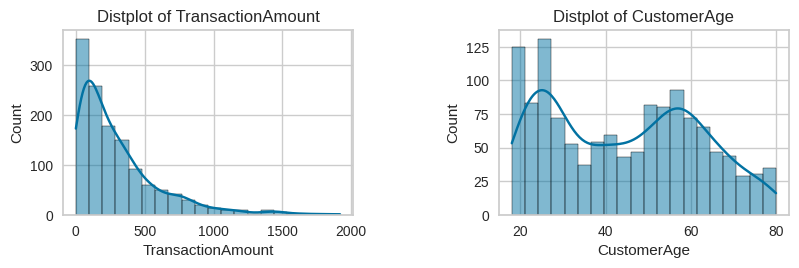

In [ ]:
plt.figure(1, figsize=(15, 6))
n = 0
for x in ['TransactionAmount', 'CustomerAge']:
    n += 1
    plt.subplot(2, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(cluster_0[x], bins=20, kde=True)  # ✅ Fix pakai histplot
    plt.title('Distplot of {}'.format(x))
plt.show()

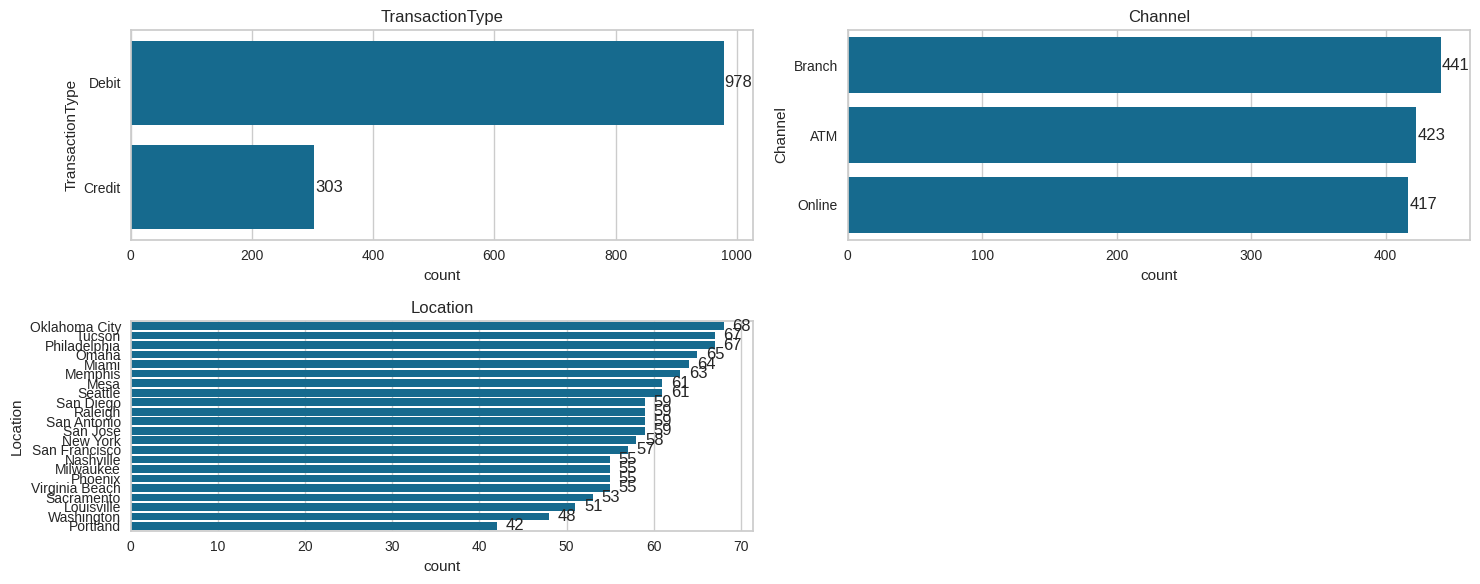

In [ ]:
plt.figure(figsize=(15, 6))
n = 0
for x in ['TransactionType', 'Channel', 'Location']:  # Variabel kategori
    n += 1
    plt.subplot(2, 2, n)
    order = cluster_0[x].value_counts().index

    ax = sns.countplot(y=x, data=cluster_0, order=order)

    # Tambahin label jumlah
    for p in ax.patches:
        count = int(p.get_width())
        ax.text(p.get_width() + 1, p.get_y() + p.get_height() / 2,
                f'{count}', va='center')

    plt.title(f'{x}')

plt.tight_layout()
plt.show()

### Cluster 1

In [ ]:
# Melihat ringkasan statistik
print(cluster_1.describe())

       TransactionAmount  CustomerAge  cluster
count        1231.000000  1231.000000   1231.0
mean          295.648928    45.014622      1.0
std           283.821498    17.947388      0.0
min             0.320000    18.000000      1.0
25%            78.845000    27.000000      1.0
50%           215.390000    46.000000      1.0
75%           418.025000    60.000000      1.0
max          1831.020000    80.000000      1.0


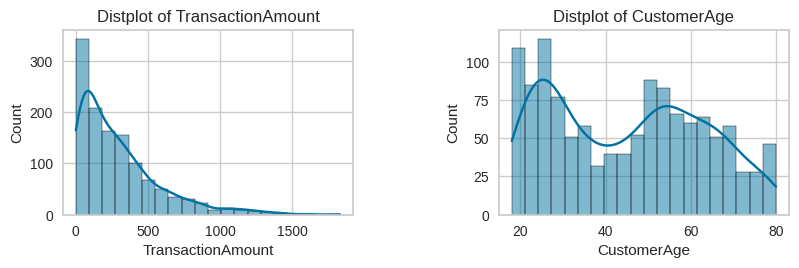

In [ ]:
plt.figure(1, figsize=(15, 6))
n = 0
for x in ['TransactionAmount', 'CustomerAge']:
    n += 1
    plt.subplot(2, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(cluster_1[x], bins=20, kde=True)  # ✅ Fix pakai histplot
    plt.title('Distplot of {}'.format(x))
plt.show()

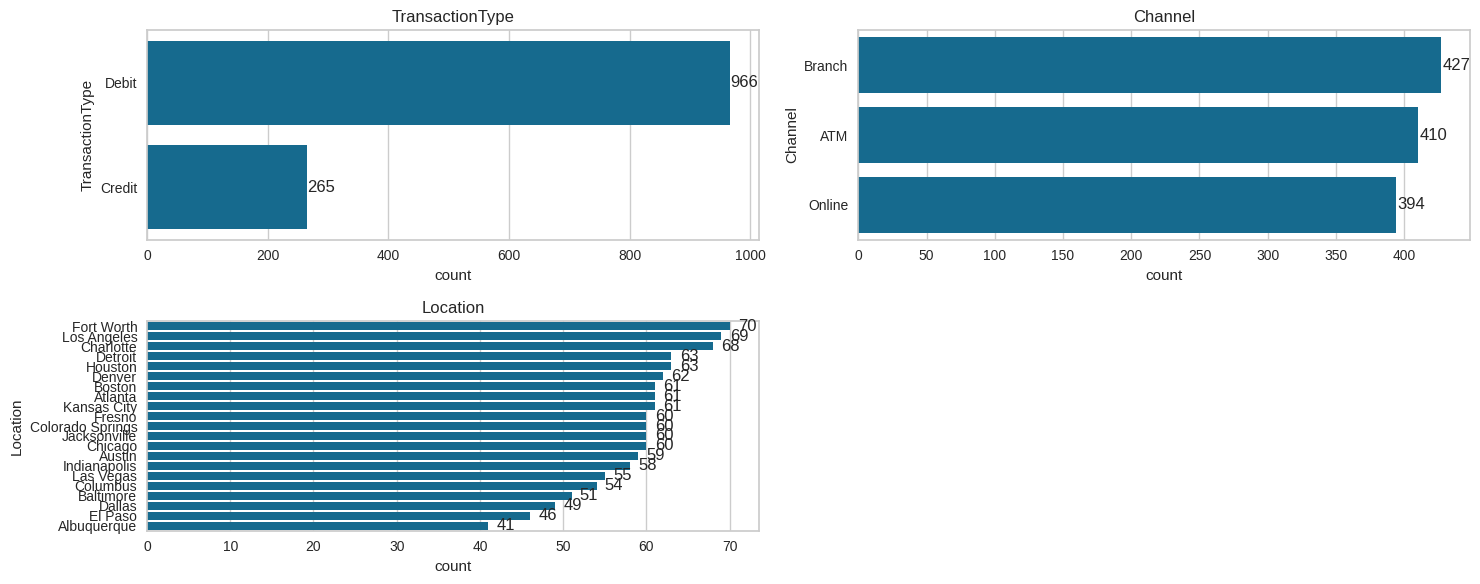

In [ ]:
plt.figure(figsize=(15, 6))
n = 0
for x in ['TransactionType', 'Channel', 'Location']:  # Variabel kategori
    n += 1
    plt.subplot(2, 2, n)
    order = cluster_1[x].value_counts().index

    ax = sns.countplot(y=x, data=cluster_1, order=order)

    # Tambahin label jumlah
    for p in ax.patches:
        count = int(p.get_width())
        ax.text(p.get_width() + 1, p.get_y() + p.get_height() / 2,
                f'{count}', va='center')

    plt.title(f'{x}')

plt.tight_layout()
plt.show()

# Interpretasi
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Jumlah anggota:** 1281

- **Rata-rata TransactionAmount(dollar):** 299.462717

Transaksi dalam cluster ini tergolong menengah ke atas, karena median sekitar 200 dollar dan Q3 mencapai 400 dollar

- **Rata-rata CustomerAge:** 44.34 ≈ 44

Cluster ini didominasi oleh pelanggan usia dewasa produktif (27 - 59 tahun). Mayoritas nasabah berada di usia middle age.

- **Transaction Type:** Dominan adalah Debit sebanyak 978 transaksi (±76%)

Cluster ini didominasi oleh pelanggan yang lebih sering menggunakan Debit daripada Credit. Bisa jadi ini cluster nasabah yang lebih konservatif atau biasa hanya memakai dana milik sendiri, bukan kredit.

- **Channel:** Transaksi dilakukan denan beraagm channel

- **Location:** Top 3: Oklahoma City (68), Houston (67), Philadelphia (67)

Sebaran kota cukup merata, tapi beberapa kota mendominasi.

- **Kesimpulan:** Nasabah dalam Cluster 0 mayoritas berasal dari kalangan dewasa produktif, yang lebih sering melakukan transaksi menggunakan debit dibandingkan kredit. Meskipun tersedia layanan ATM dan online, kelompok ini masih menunjukkan kecenderungan untuk bergantung pada layanan kantor cabang dalam melakukan transaksi. Selain itu, nasabah dalam cluster ini juga melakukan transaksi dengan nominal yang relatif besar. Dari sisi persebaran, nasabah cluster ini tersebar di berbagai kota di seluruh wilayah Amerika Serikat, tanpa adanya dominasi dari wilayah atau kota tertentu.

## Cluster 1:
- **Jumlah anggota:** 1231

- **Rata-rata TransactionAmount(dollar):** 295.65

Cluster ini memiliki karakteristik transaksi yang juga cukup besar, dengan rata-rata hampir 300 dollar. → Transaksi besar (di atas 400 dollar) cukup sering, terlihat dari posisi Q3.

- **Rata-rata CustomerAge:** 45

Cluster ini didominasi oleh nasabah dewasa produktif dan pra-pensiun. → Mirip seperti cluster sebelumnya, tetapi dengan umur rata-rata yang sedikit lebih tinggi.

- **Transaction Type:** Dominan adalah Debit sebanyak 966 transaksi(±76%)

Sama seperti cluster sebelumnya, nasabah cluster ini lebih dominan menggunakan debit dibandingkan kredit. Artinya, mereka cenderung bertransaksi menggunakan dana yang tersedia (bukan hutang).

- **Channel:** dominan: Branch (Kantor Cabang): 427 transaksi

Nasabah dalam cluster ini lebih sering datang ke kantor cabang, meskipun tetap aktif menggunakan ATM dan layanan Online. → Ini menunjukkan bahwa cluster ini masih cukup bergantung pada layanan tradisional, tetapi cukup terbuka juga dengan layanan elektronik.


- **Location:** Top 3: Fort Worth (70), Phoenix (69), Boston (69)

Sebaran kota cukup merata dan tersebar di berbagai wilayah, namun ada beberapa kota yang menjadi pusat aktivitas cluster ini. → Tidak terlihat dominasi dari satu region saja.

- **Kesimpulan:** Cluster 1 didominasi oleh nasabah dengan rentang usia dewasa produktif hingga pra-pensiun, dengan rata-rata umur sekitar 45 tahun. Nasabah dalam cluster ini lebih sering menggunakan debit dibandingkan kredit, menunjukkan kecenderungan untuk bertransaksi menggunakan dana yang tersedia secara langsung. Meskipun telah tersedia layanan ATM dan online, nasabah dalam cluster ini masih menunjukkan kecenderungan tinggi untuk melakukan transaksi melalui kantor cabang (branch). Selain itu, nasabah cluster ini cenderung melakukan transaksi dengan nominal yang cukup besar, dengan rata-rata mendekati $296, dan tersebar di berbagai kota besar tanpa adanya dominasi wilayah geografis tertentu.


# Perbandingan
- Kedua cluster memiliki karakteristik yang mirip dari segi demografi, yaitu sama-sama berisi nasabah dengan usia dewasa produktif hingga pra-pensiun.

- Keduanya lebih sering menggunakan debit dibanding kredit.

- Perbedaan utamanya terletak pada channel:

1. Cluster 0 lebih sering memanfaatkan ATM dan Online.

2. Cluster 1 masih lebih banyak menggunakan kantor cabang dibandingkan channel lainnya.

- Dari segi nilai transaksi, keduanya sama-sama berada di kategori menengah ke atas dengan rata-rata transaksi mendekati $300.

- Kedua cluster juga memiliki sebaran kota yang luas, namun dengan kota dominan yang berbeda.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
url = 'https://raw.githubusercontent.com/fathiyyaa/Proyek-Machine-Learning/main/data/bank_transactions_data_2.csv'
df_label = pd.read_csv(url, sep=',')

In [ ]:
df_label["cluster"] = labels

In [ ]:
df_label.to_csv('data_berlabel.csv', index=False)
from google.colab import files
files.download('data_berlabel.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>